#Implementing PCA from Scratch and Applying it to Car Data

In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

##Data Understanding and Representation:

In [20]:
cars_data = pd.read_csv('/content/audi.csv')
cars_data

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,A1,2017,12500,Manual,15735,Petrol,150,55.4,1.4
1,A6,2016,16500,Automatic,36203,Diesel,20,64.2,2.0
2,A1,2016,11000,Manual,29946,Petrol,30,55.4,1.4
3,A4,2017,16800,Automatic,25952,Diesel,145,67.3,2.0
4,A3,2019,17300,Manual,1998,Petrol,145,49.6,1.0
...,...,...,...,...,...,...,...,...,...
10663,A3,2020,16999,Manual,4018,Petrol,145,49.6,1.0
10664,A3,2020,16999,Manual,1978,Petrol,150,49.6,1.0
10665,A3,2020,17199,Manual,609,Petrol,150,49.6,1.0
10666,Q3,2017,19499,Automatic,8646,Petrol,150,47.9,1.4


In [21]:
#removing non-numeric data columns from the dataset
non_numeric_cols = ['model','transmission','price','fuelType']
X = cars_data.drop(columns = non_numeric_cols)
X

,year,mileage,tax,mpg,engineSize
0,2017,15735,150,55.4,1.4
1,2016,36203,20,64.2,2.0
2,2016,29946,30,55.4,1.4
3,2017,25952,145,67.3,2.0
4,2019,1998,145,49.6,1.0
...,...,...,...,...,...
10663,2020,4018,145,49.6,1.0
10664,2020,1978,150,49.6,1.0
10665,2020,609,150,49.6,1.0
10666,2017,8646,150,47.9,1.4


##Implementing PCA using Covariance Matrices:

In [24]:
#Normalization of data
X = (X - X.mean()) / X.std()
X

,year,mileage,tax,mpg,engineSize
0,-0.046448,-0.386817,0.357131,0.357533,-0.880177
1,-0.507810,0.483966,-1.578249,1.037081,0.114919
2,-0.507810,0.217771,-1.429373,0.357533,-0.880177
3,-0.046448,0.047851,0.282693,1.276468,0.114919
4,0.876277,-0.971240,0.282693,-0.090351,-1.543575
...,...,...,...,...,...
10663,1.337639,-0.885302,0.282693,-0.090351,-1.543575
10664,1.337639,-0.972091,0.357131,-0.090351,-1.543575
10665,1.337639,-1.030333,0.357131,-0.090351,-1.543575
10666,-0.046448,-0.688410,0.357131,-0.221627,-0.880177


CO-VARIANCE Matrix

In [26]:
covariance_matrix = np.cov(X,rowvar=False)
covariance_matrix

array([[ 1.        , -0.78966699,  0.09306616, -0.35128087, -0.0315823 ],
       [-0.78966699,  1.        , -0.16654715,  0.39510337,  0.07071017],
       [ 0.09306616, -0.16654715,  1.        , -0.63590853,  0.39307544],
       [-0.35128087,  0.39510337, -0.63590853,  1.        , -0.36562073],
       [-0.0315823 ,  0.07071017,  0.39307544, -0.36562073,  1.        ]])

##Eigenvalue-Eigenvector Equation:

In [27]:
# eigenvalues is a 1D array containing the eigenvalues of the covariance matrix
# eigenvectors is a 2D array where each column is an eigenvector corresponding to the eigenvalue at the same index

eigenvalues, eigenvectors = np.linalg.eig(covariance_matrix)

In [29]:
#Sorting the eigenvectors by decreasing eigenvalues
index = eigenvalues.argsort()[::-1]
eigenvalues = eigenvalues[index]
eigenvectors = eigenvectors[:,index]

# Converting eigenvalues to explained variance ratios
explained_variance = eigenvalues / eigenvalues.sum()

print("Eigenvalues: ", eigenvalues)
print("Eigenvectors: ", eigenvectors)
print("Explained Variance: ", explained_variance)

Eigenvalues:  [2.31297823 1.54968025 0.62002561 0.31552269 0.20179322]
Eigenvectors:  [[-0.46373634  0.48249022 -0.26369364 -0.10806712  0.68624992]
 [ 0.48575669 -0.46716498  0.0732536   0.17892982  0.7130325 ]
 [-0.43356476 -0.43702648  0.49512711 -0.60322362  0.10954391]
 [ 0.5485194   0.22908421 -0.24802587 -0.76491314 -0.00616002]
 [-0.24522869 -0.55271001 -0.7864044  -0.08564328 -0.09277865]]
Explained Variance:  [0.46259565 0.30993605 0.12400512 0.06310454 0.04035864]


##Showing Sequential Variance Increase:

In [30]:
cumulative_explained_variance = np.cumsum(explained_variance)

# Convert cumulative explained variance into percentages
cumulative_explained_variance_percentage = cumulative_explained_variance * 100
cumulative_explained_variance_percentage

array([ 46.25956452,  77.25316956,  89.65368173,  95.96413556,
       100.        ])

In [31]:
k = np.argmax(cumulative_explained_variance >= 0.85) + 1
top_k_eigenvectors = eigenvectors[:,:k]
top_k_eigenvalues = eigenvalues[:k]

print(f"k = {k}")

k = 3


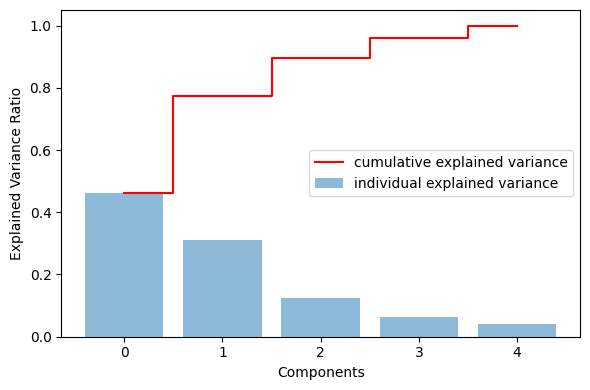

In [33]:
plt.figure(figsize=(6, 4))

plt.step(range(5), cumulative_explained_variance, color = 'red', where = 'mid', label = 'cumulative explained variance')
plt.bar(range(5), explained_variance, alpha = 0.5, align = 'center', label = 'individual explained variance')
plt.ylabel('Explained Variance Ratio')
plt.xlabel('Components')
plt.legend(loc='best')
plt.tight_layout()

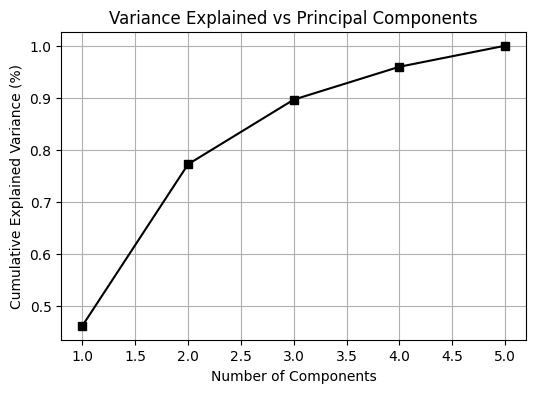

In [39]:
plt.figure(figsize=(6, 4))
plt.plot(range(1, len(cumulative_explained_variance)+1), cumulative_explained_variance, 'ks-')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance (%)')
plt.title('Variance Explained vs Principal Components')
plt.grid(True)
plt.show()

##Visualization using Pair Plots:

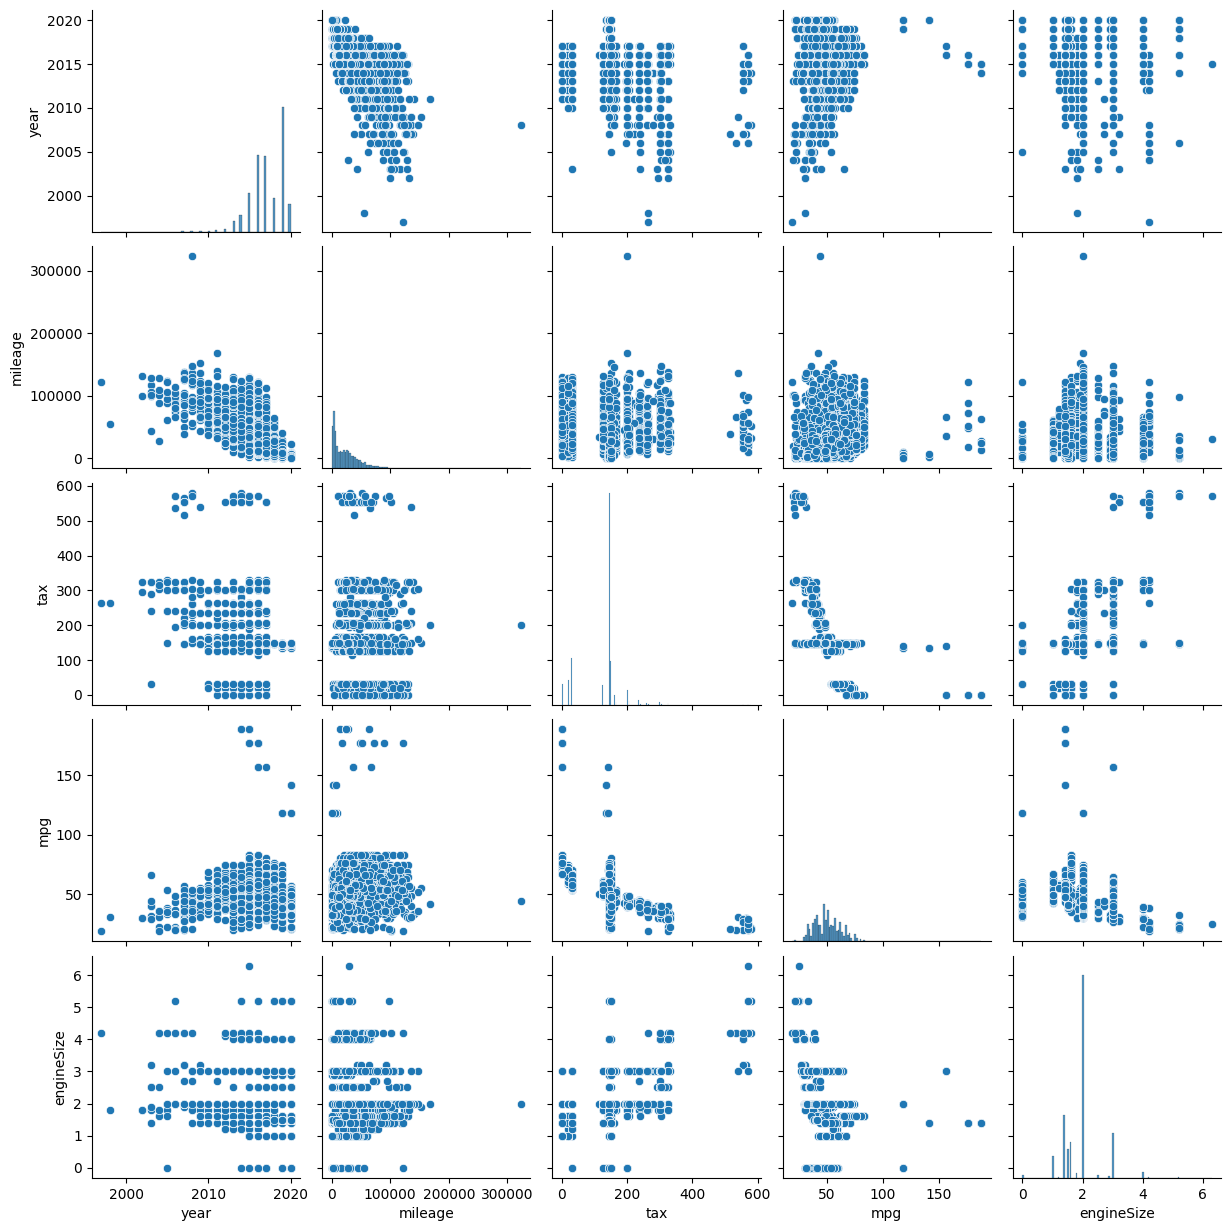

In [16]:
sns.pairplot(cars_data)
plt.show()

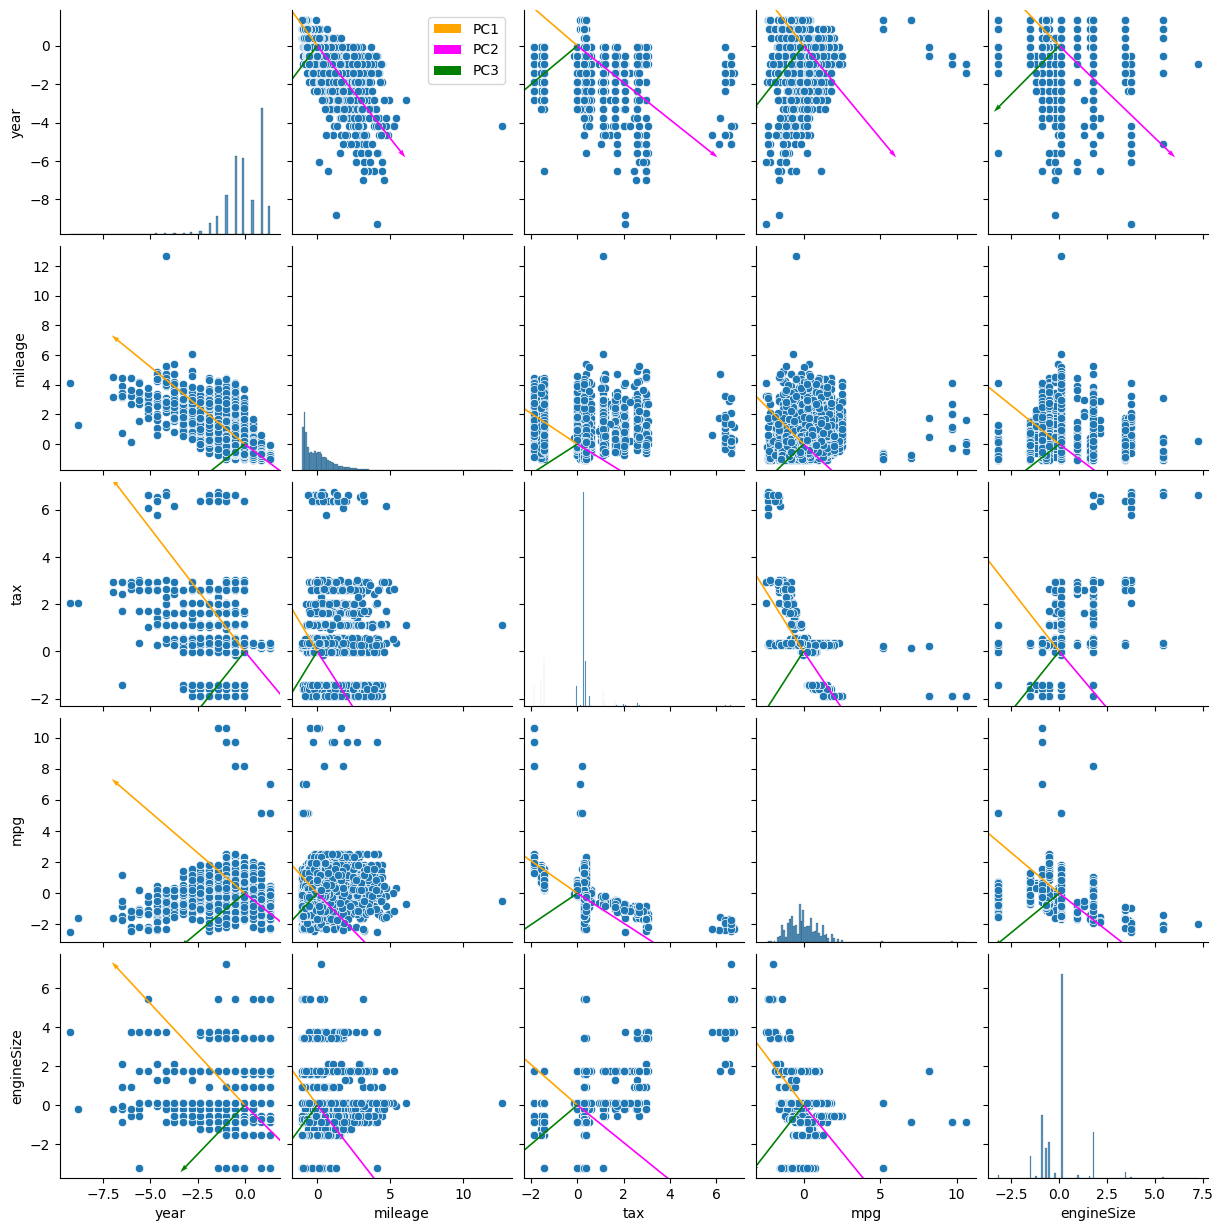

In [42]:
g = sns.pairplot(X)
axes = g.axes
for i in range(X.shape[1]):
    for j in range(X.shape[1]):
        if i != j:
          for z in range(k):
            pc = top_k_eigenvectors[z]
            pc_scaled = np.sqrt(top_k_eigenvalues[z]) * pc
            if(z == 0):
              axes[i, j].quiver(0, 0, pc_scaled[0], pc_scaled[1], angles='xy', scale_units='xy', scale=0.1, color='orange', label = 'PC1')
            if(z == 1):
              axes[i, j].quiver(0, 0, pc_scaled[0], pc_scaled[1], angles='xy', scale_units='xy', scale=0.1, color='magenta', label = 'PC2')
            if(z == 2):
              axes[i, j].quiver(0, 0, pc_scaled[0], pc_scaled[1], angles='xy', scale_units='xy', scale=0.1, color='green', label = 'PC3')

axes[0,1].legend()
plt.show()